In [1]:
# Data analysis tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For Train-Test Split
from sklearn.model_selection import train_test_split

# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics Tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc

In [2]:
data=pd.read_csv("D:\C Backup\Downloads\People Charm case.csv")

In [3]:
data

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [4]:
data.head(20)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#duplicates
len(data[data.duplicated()])

3008

In [7]:
# Removing all duplicates
data=data.drop_duplicates(subset=None, keep='first', inplace=False)

<AxesSubplot:ylabel='percentage'>

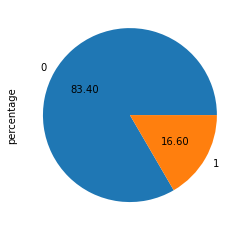

In [8]:
data.groupby('left').size().plot(kind='pie', autopct='%.2f',ylabel='percentage')

In [9]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Printing interquartile range (IQR) for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfactoryLevel         0.34
lastEvaluation            0.29
numberOfProjects          2.00
avgMonthlyHours          86.00
timeSpent.company         1.00
workAccident              0.00
left                      0.00
promotionInLast5years     0.00
dtype: float64


C:\Users\Abi Priyanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='numberOfProjects'>

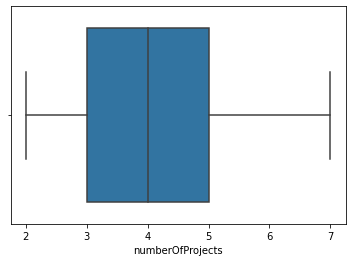

In [11]:
sns.boxplot(data["numberOfProjects"])

C:\Users\Abi Priyanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='timeSpent.company'>

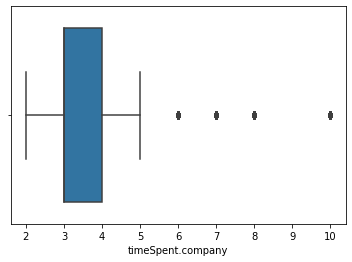

In [12]:
sns.boxplot(data["timeSpent.company"])

In [13]:
data["timeSpent.company"]=np.where(data["timeSpent.company"]>=6,data["timeSpent.company"].median(),data["timeSpent.company"])

C:\Users\Abi Priyanka\AppData\Local\Temp\ipykernel_2176\3765294542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["timeSpent.company"]=np.where(data["timeSpent.company"]>=6,data["timeSpent.company"].median(),data["timeSpent.company"])


C:\Users\Abi Priyanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avgMonthlyHours'>

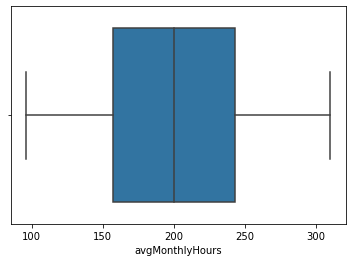

In [14]:
sns.boxplot(data["avgMonthlyHours"])

In [15]:
#converting categorical values to numeric
cols=['dept', 'salary']
for label in cols:
    data[label]=LabelEncoder().fit_transform(data[label])
data.head()

C:\Users\Abi Priyanka\AppData\Local\Temp\ipykernel_2176\4072712121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[label]=LabelEncoder().fit_transform(data[label])


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,7,1
1,0.80,0.86,5,262,3.0,0,1,0,7,2
2,0.11,0.88,7,272,4.0,0,1,0,7,2
3,0.37,0.52,2,159,3.0,0,1,0,7,1
4,0.41,0.50,2,153,3.0,0,1,0,7,1


<AxesSubplot:>

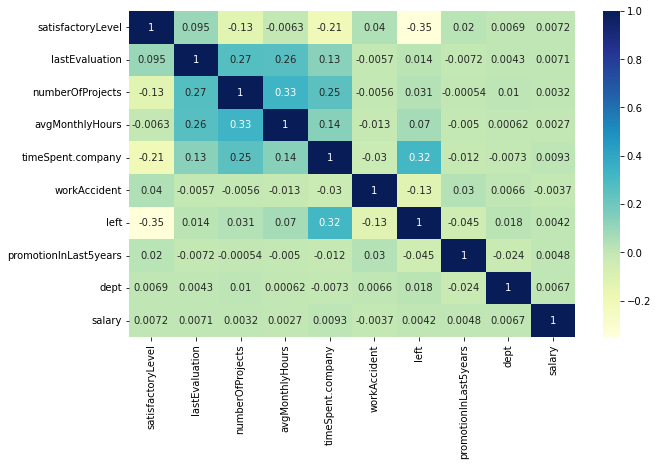

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap = "YlGnBu", annot = True)

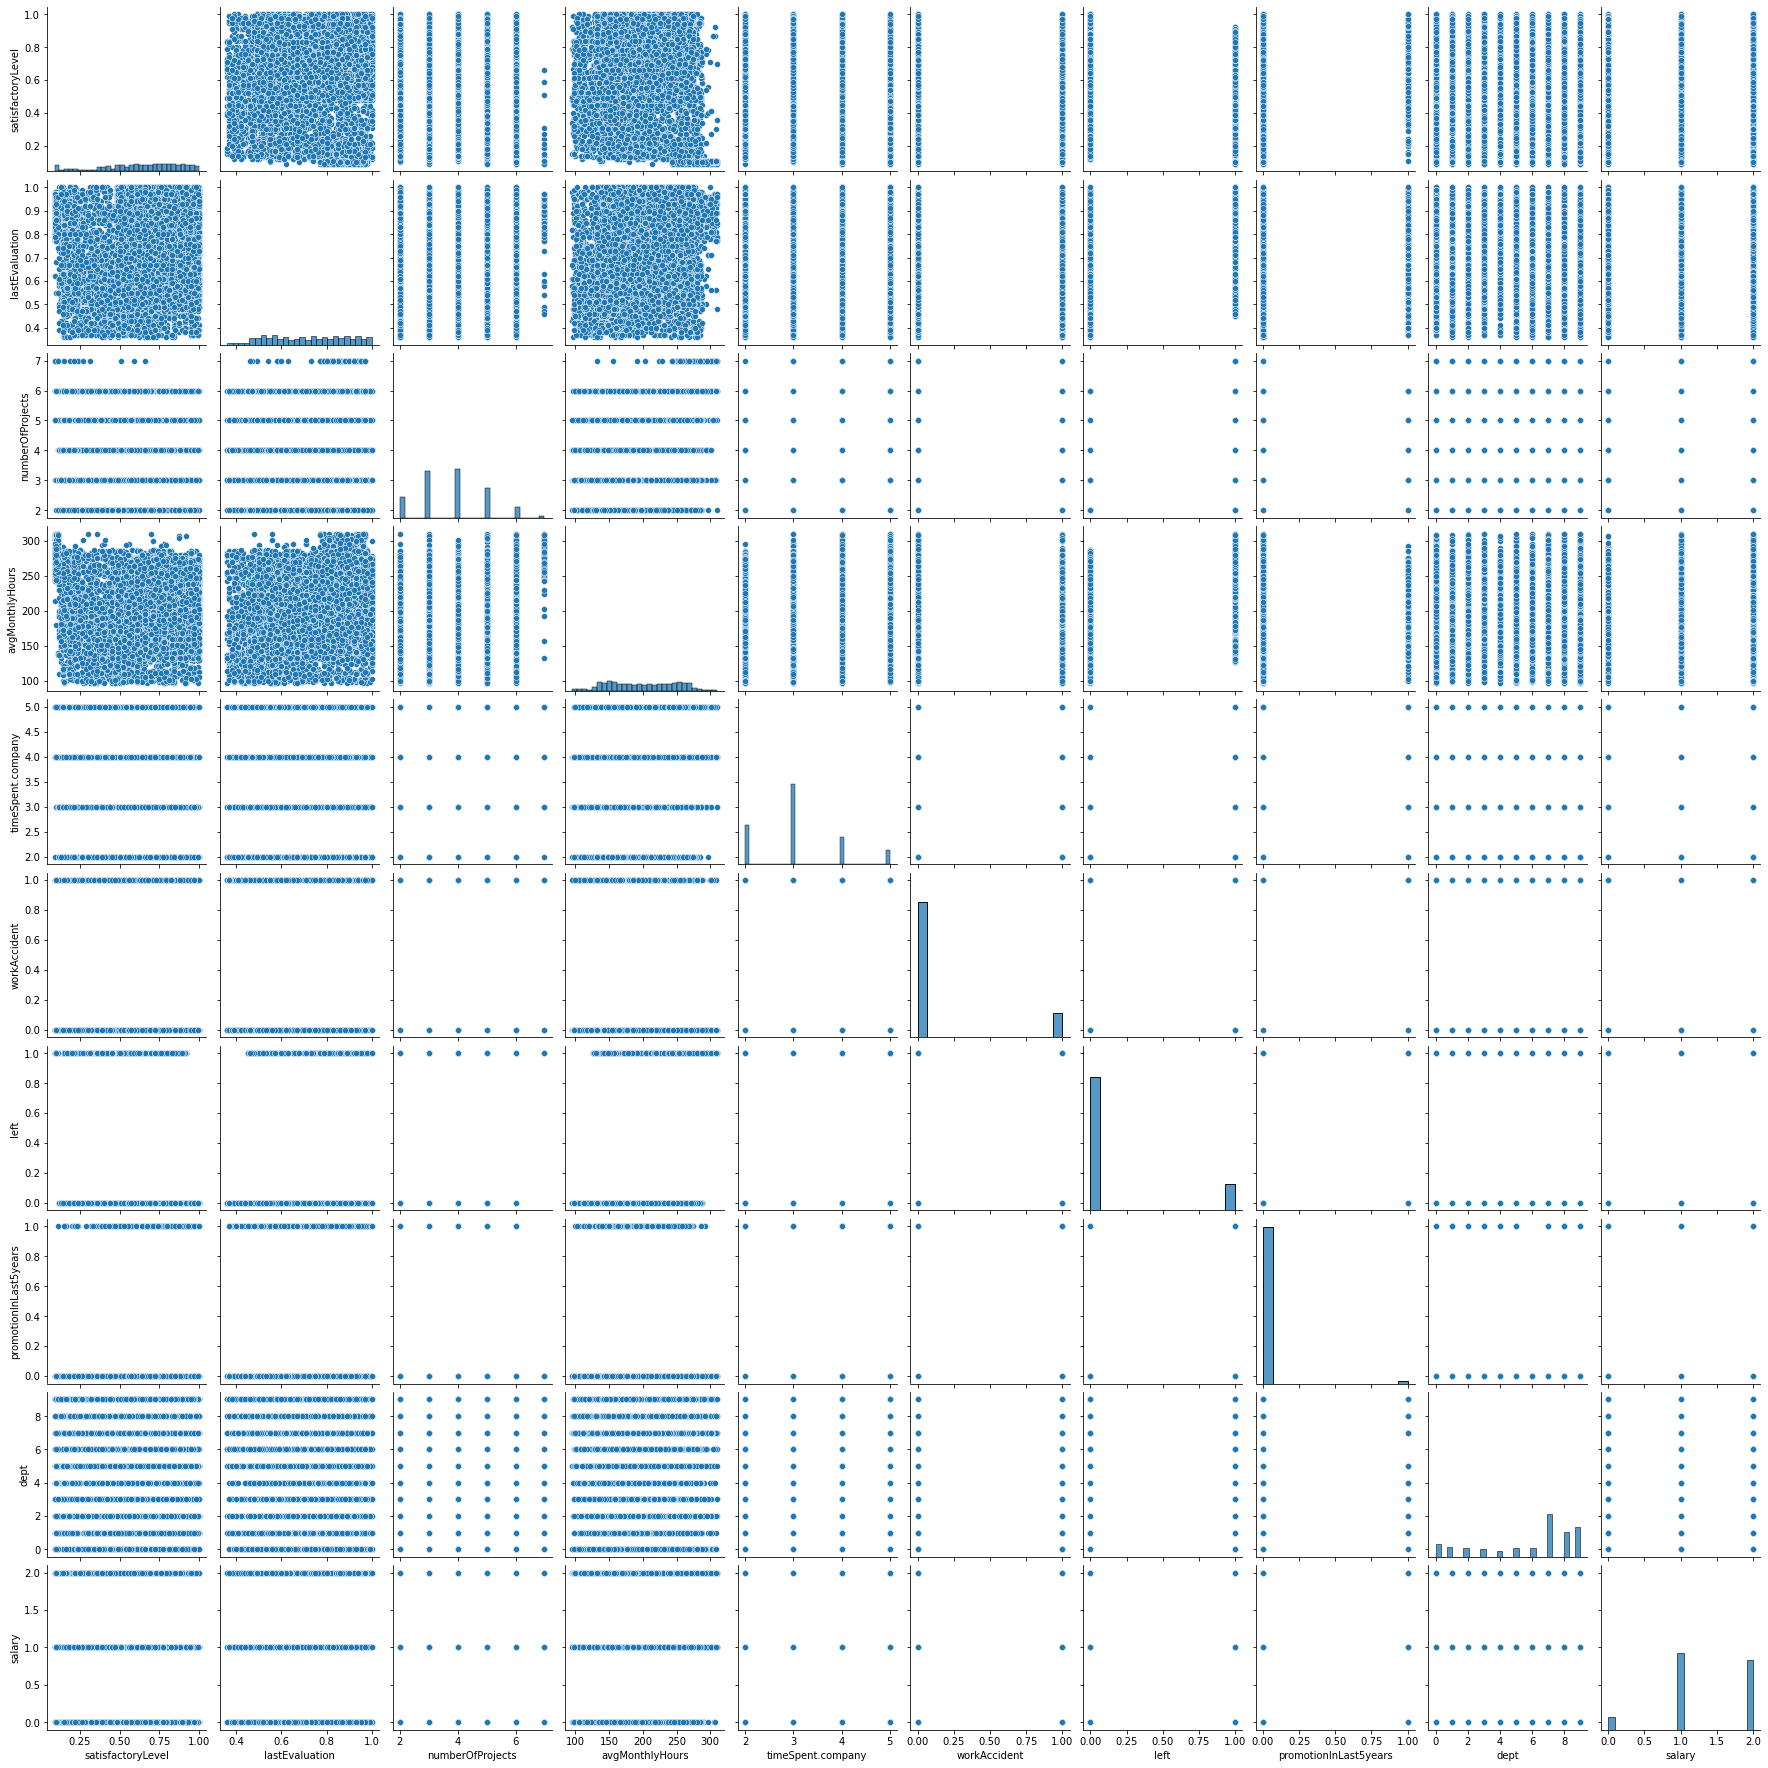

In [17]:
sns.pairplot(data)

In [18]:
X=data.drop(["left"],axis=1)
y=data["left"]
scaler=StandardScaler()
X =scaler.fit_transform(X)

In [19]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## LOGISTIC REGRESSION

In [20]:
# Make an instance of the Model
logistic = LogisticRegression()

# Fitting the values for x and y
logistic.fit(x_train,y_train)
logistic.coef_
logistic.intercept_


array([-2.19278288])

In [21]:
# Prediction from test data
prediction = logistic.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [22]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')

[[2881  134]
 [ 448  135]]
True Positive[TP] = 135 
True Negative[TN]= 2881 
False Positive[FP]= 134 
False Negative[FN]= 448 



In [23]:
# Finding Accuracy
logreg = accuracy_score(prediction,y_test)*100
print(logreg)

83.82434685936632


In [24]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_test != prediction).sum())

Misclassified samples: 582


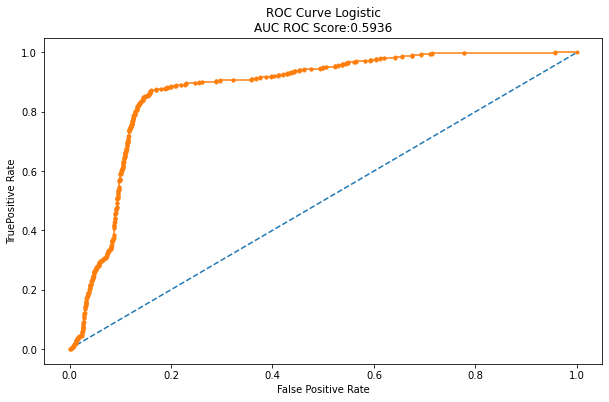

In [25]:

pred_prob_lmod1 = logistic.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_lmod1)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'Logistic'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,prediction)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

## KNN

In [30]:
# Storing the K nearest neighbors classifier
KNN = KNeighborsClassifier(n_neighbors = 5)  


In [31]:
# Fitting the values for X and Y
KNN.fit(x_train, y_train) 


KNeighborsClassifier()

In [32]:
# Predicting the test values with model
predictionknn = KNN.predict(x_test)

In [48]:
# Performance metric check
confusion_matrix2 = confusion_matrix(y_test, predictionknn)
print(confusion_matrix2)


[[2954   61]
 [  72  511]]


In [34]:
# Calculating the accuracy
accuracy_score2=accuracy_score(y_test, predictionknn)
print(accuracy_score2)

0.9630350194552529


In [35]:
print('Misclassified samples: %d' % (y_test != predictionknn).sum())

Misclassified samples: 133


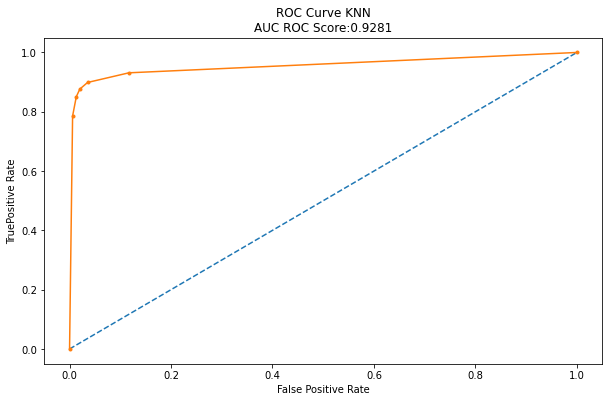

In [36]:
pred_prob_knn = KNN_cf.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_knn)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'KNN'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,predictionknn)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

## DECISION TREE

In [37]:
#Fitting the model

dtree = DecisionTreeClassifier()
classf = dtree.fit(x_train,y_train)

In [38]:
# Applying the model to the x_test

predictiondtree = classf.predict(x_test)
predictiondtree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Finding Accuracy

dectree= accuracy_score(predictiondtree,y_test)*100
print(dectree)

95.91439688715954


In [40]:
# Confusion Matrix

conf_dtree=confusion_matrix(y_test,predictiondtree)
print(conf_dtree)
TP = conf_dtree[1,1] # true positive 
TN = conf_dtree[0,0] # true negatives
FP = conf_dtree[0,1] # false positives
FN = conf_dtree[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')


[[2927   88]
 [  59  524]]
True Positive[TP] = 524 
True Negative[TN]= 2927 
False Positive[FP]= 88 
False Negative[FN]= 59 



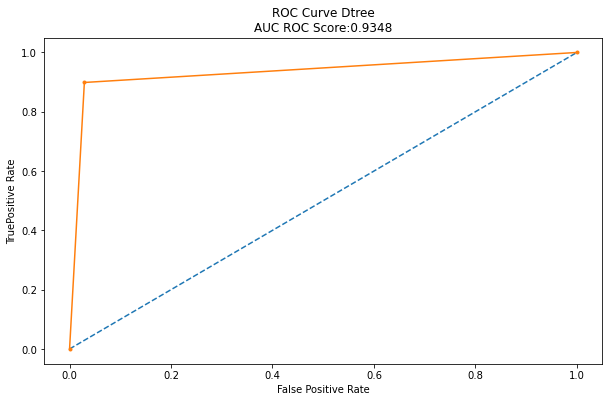

In [41]:
pred_prob_dtree = dtree.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_dtree)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'Dtree'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,predictiondtree)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()

## Random Forest

In [42]:
#Fitting the model

rft = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=10)
rft.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [43]:
# Applying the model to the x_test

pred_rft= rft.predict(x_test)
pred_rft

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# Finding Accuracy

RanFor = accuracy_score(y_test,pred_rft)*100
print(RanFor)

98.0544747081712


In [45]:
# Confusion Matrix

conf_rft=confusion_matrix(y_test,pred_rft)
print(conf_rft)
TP = conf_rft[1,1] # true positive 
TN = conf_rft[0,0] # true negatives
FP = conf_rft[0,1] # false positives
FN = conf_rft[1,0] # false negatives
print('True Positive[TP] =',TP,'\nTrue Negative[TN]=',TN,'\nFalse Positive[FP]=',FP,'\nFalse Negative[FN]=',FN,'\n')


[[3012    3]
 [  67  516]]
True Positive[TP] = 516 
True Negative[TN]= 3012 
False Positive[FP]= 3 
False Negative[FN]= 67 



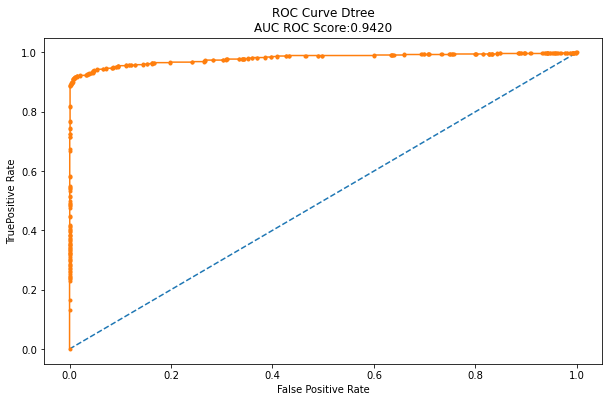

In [46]:
pred_prob_rft = rft.predict_proba(x_test)[:,1]


# ROC Curve
f, ax = plt.subplots(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y_test,pred_prob_rft)
plt.plot([0, 1], [0, 1], linestyle='--')
# ROC Curve 
plt.plot(fpr, tpr, marker='.',label='AUC = {:.2f}'.format(auc(fpr, tpr)))
ax.set_title('ROC Curve ' +'Dtree'+'\nAUC ROC Score:{0:.4f}'.format(roc_auc_score(y_test,pred_rft)))
plt.xlabel("False Positive Rate")
plt.ylabel("TruePositive Rate")
plt.show()